In [104]:
# Imports
import os
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [105]:
# Load dataset
data = pd.read_csv("../data/02_engineered_data.csv")

In [106]:
data.head(10)

,WEIGHT,GENDER,NUMBER_OF_CHILDREN,AGE,HOUSEHOLD_SIZE,TV_TOTAL,FLYERS,PRINT_TOTAL,ONLINE_VIDEO,ONLINE_DISPLAY,...,DIGITAL_MEDIA_TOTAL,TRADITIONAL_MEDIA_TOTAL,SOCIAL_MEDIA_TOTAL,VIDEO_MEDIA_TOTAL,MEDIA_PER_HOUSEHOLD_MEMBER,MEDIA_PER_CHILD,AGE_GROUP,HEAVY_MEDIA_USER,ENGAGED_VIDEO_USER,TARGET_GROUP
0,11032.10,male,0.0,28.0,2.0,0.0,0.0,0.0,10.0,4.0,...,14.0,0.0,0.0,10.0,7.000000,14.0,18-34,1,1,0
1,2581.77,female,0.0,52.0,2.0,0.0,0.0,1.0,0.0,0.0,...,2.0,1.0,2.0,2.0,1.500000,3.0,45-54,0,1,0
2,8219.48,male,1.0,38.0,3.0,4.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,1.0,1.666667,2.5,35-44,1,1,1
3,6040.79,male,2.0,38.0,4.0,0.0,0.0,0.0,11.0,2.0,...,39.0,0.0,26.0,12.0,9.750000,13.0,35-44,1,1,1
4,11635.16,male,0.0,28.0,2.0,0.0,0.0,0.0,7.0,3.0,...,10.0,0.0,0.0,7.0,5.000000,10.0,18-34,1,1,0
5,13456.38,female,0.0,27.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,18-34,0,0,0
6,3881.71,female,0.0,38.0,1.0,4.0,0.0,0.0,6.0,5.0,...,12.0,4.0,1.0,7.0,16.000000,16.0,35-44,1,1,1
7,3993.45,female,0.0,52.0,2.0,3.0,0.0,0.0,9.0,6.0,...,20.0,3.0,5.0,11.0,11.500000,23.0,45-54,1,1,0
8,6353.90,male,0.0,91.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.000000,1.0,75+,0,0,0
9,2966.01,male,0.0,69.0,2.0,81.0,3.0,1.0,0.0,0.0,...,0.0,85.0,0.0,0.0,42.500000,85.0,65-74,1,0,0


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16048 entries, 0 to 16047
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   WEIGHT                      16048 non-null  float64
 1   GENDER                      16048 non-null  object 
 2   NUMBER_OF_CHILDREN          16048 non-null  float64
 3   AGE                         16048 non-null  float64
 4   HOUSEHOLD_SIZE              16048 non-null  float64
 5   TV_TOTAL                    16048 non-null  float64
 6   FLYERS                      16048 non-null  float64
 7   PRINT_TOTAL                 16048 non-null  float64
 8   ONLINE_VIDEO                16048 non-null  float64
 9   ONLINE_DISPLAY              16048 non-null  float64
 10  ONLINE_TOTAL                16048 non-null  float64
 11  TIKTOK                      16048 non-null  float64
 12  YOUTUBE_TOTAL               16048 non-null  float64
 13  YOUTUBE_MOBILE              160

In [108]:
# Listing Numerical columns
cols = data.columns
num_cols = list(data.select_dtypes('number'))

print(f"Number of numerical columns: {len(num_cols)}")
print(num_cols)

Number of numerical columns: 29
['WEIGHT', 'NUMBER_OF_CHILDREN', 'AGE', 'HOUSEHOLD_SIZE', 'TV_TOTAL', 'FLYERS', 'PRINT_TOTAL', 'ONLINE_VIDEO', 'ONLINE_DISPLAY', 'ONLINE_TOTAL', 'TIKTOK', 'YOUTUBE_TOTAL', 'YOUTUBE_MOBILE', 'YOUTUBE_DESKTOP', 'YOUTUBE_TABLET', 'YOUTUBE_CTV', 'PINTEREST', 'OUTLIER_SCORE', 'OUTLIER', 'TOTAL_MEDIA_EXPOSURE', 'DIGITAL_MEDIA_TOTAL', 'TRADITIONAL_MEDIA_TOTAL', 'SOCIAL_MEDIA_TOTAL', 'VIDEO_MEDIA_TOTAL', 'MEDIA_PER_HOUSEHOLD_MEMBER', 'MEDIA_PER_CHILD', 'HEAVY_MEDIA_USER', 'ENGAGED_VIDEO_USER', 'TARGET_GROUP']


In [109]:
# Listing Categorical columns
cat_cols = list(set(cols) - set(num_cols))

print(f"Number of categorical columns: {len(cat_cols)}")
print(cat_cols)

Number of categorical columns: 3
['AGE_GROUP', 'GENDER', 'PURCHASE']


In [110]:
# Separating the numeric and categorical columns as each will require a separate approach
df_numeric = data[num_cols]
df_categorical = data[cat_cols]

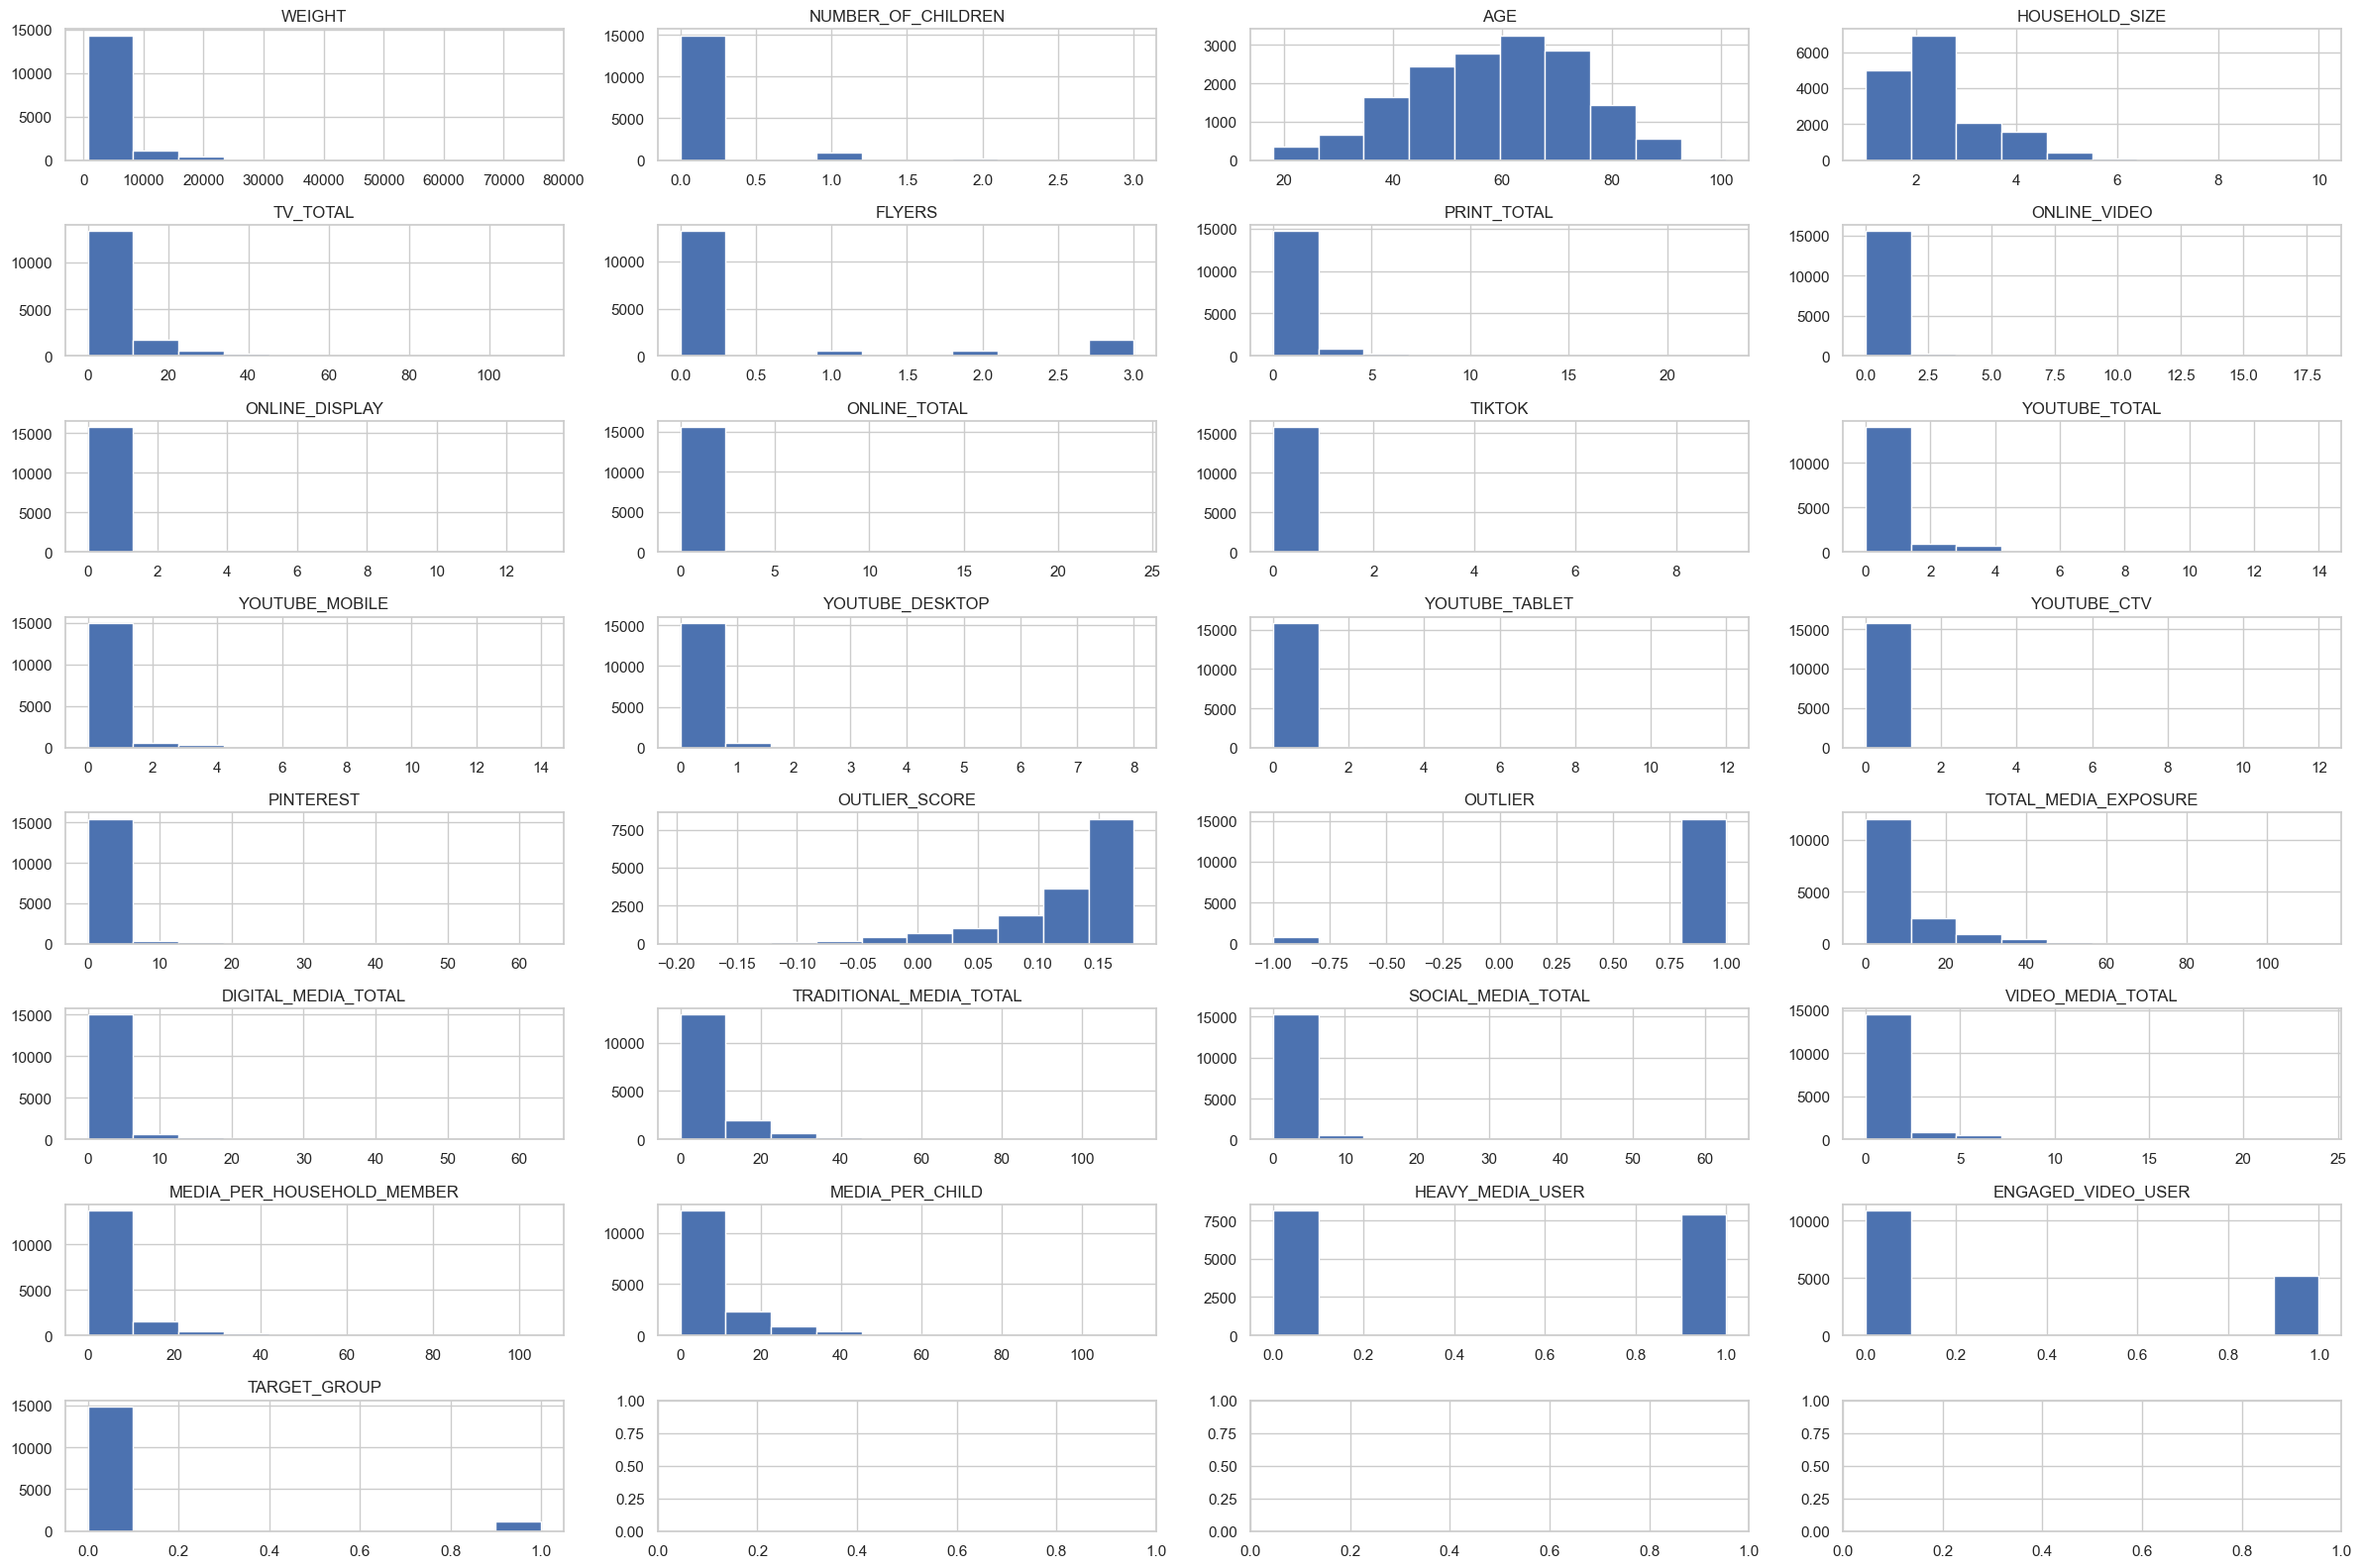

In [111]:
# Creating a grid of subplots for the numeric columns
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(24, 16))
axes = axes.flatten()  # Flatten 2D array to 1D

# Plot each histogram in a subplot
for i, col in enumerate(df_numeric.columns):
    plt.sca(axes[i])
    plt.hist(df_numeric[col])
    plt.title(col)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

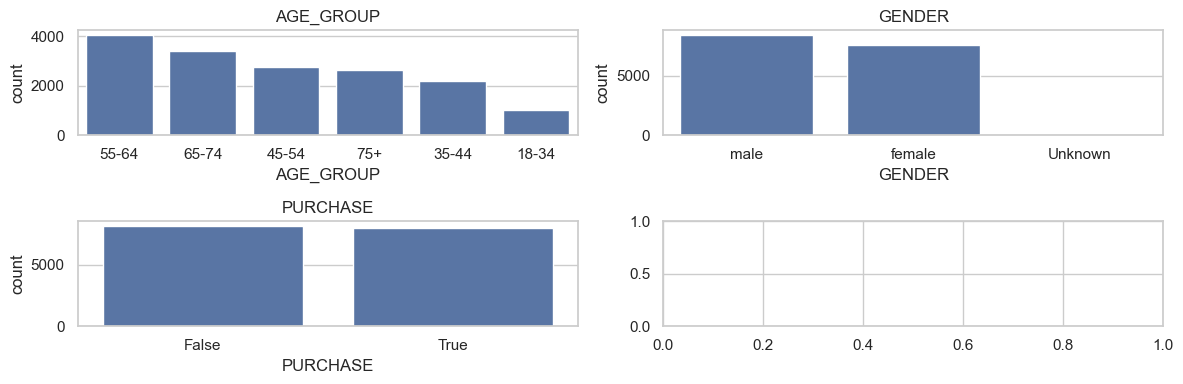

In [112]:
# Same grid of subplots as the one above but containing barplots with our categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 4))
axes = axes.flatten()

# Plot each barplot in a subplot
for i, col in enumerate(df_categorical.columns):
    sns.barplot(x=df_categorical[col].value_counts().index, y=df_categorical[col].value_counts(), ax=axes[i])
    axes[i].set_title(col)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

Purchase Rate: 49.59%


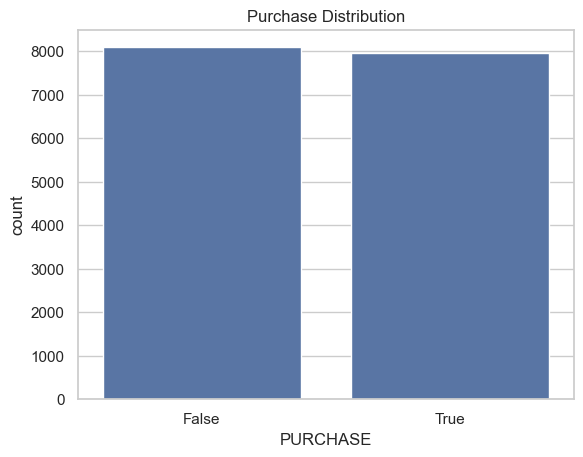

In [113]:
# Check purchase rate
purchase_rate = data['PURCHASE'].mean()
print(f"Purchase Rate: {purchase_rate:.2%}")

# Visualize class balance
sns.countplot(x='PURCHASE', data=data)
plt.title("Purchase Distribution")
plt.show()

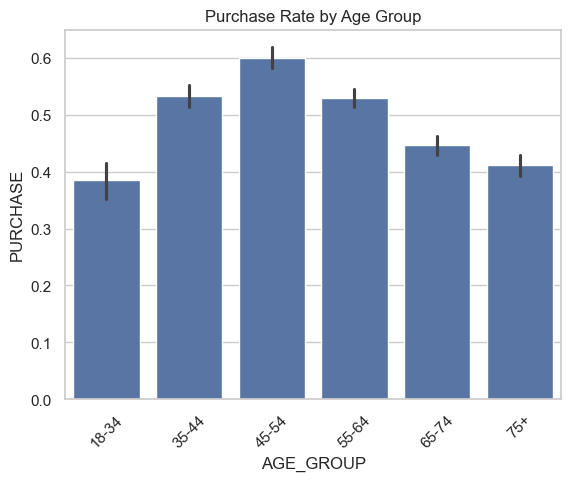

In [114]:
# Plot purchase rate by age group
age_group_order = ['18-34', '35-44', '45-54', '55-64', '65-74', '75+']

sns.barplot(x='AGE_GROUP', y='PURCHASE', data=data, estimator=lambda x: sum(x)/len(x), order=age_group_order)
plt.title("Purchase Rate by Age Group")
plt.xticks(rotation=45)
plt.show()


In [115]:
# # Manually compute weighted purchase rate per age group
# weighted_purchase = (
#     data.groupby("Age_Group").apply(lambda g: np.average(g["Purchase"], weights=g["weight"]))
# ).reset_index(name="Weighted_Purchase_Rate")

# # Now plot using the precomputed values
# sns.barplot(x="Age_Group", y="Weighted_Purchase_Rate", data=weighted_purchase)
# plt.title("Weighted Purchase Rate by Age Group")
# plt.xticks(rotation=45)
# plt.show()

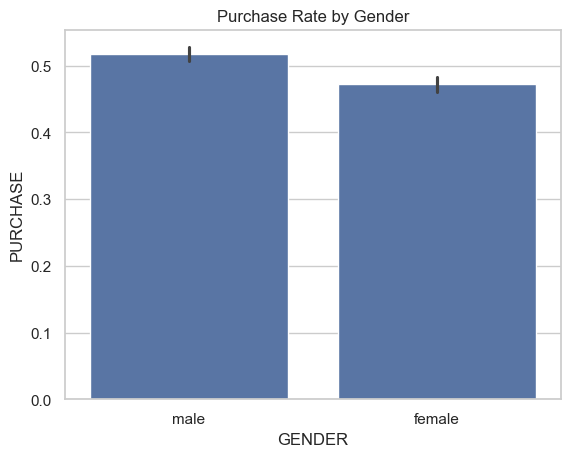

In [116]:
# Filter the data to exclude 'Unknown' gender category as there are only 3 observations
filtered_data = data[data['GENDER'] != 'Unknown']

# Plot purchase rate by gender without the 'Unknown' category
sns.barplot(x='GENDER', y='PURCHASE', data=filtered_data, estimator=lambda x: sum(x)/len(x))

plt.title("Purchase Rate by Gender")
plt.show()

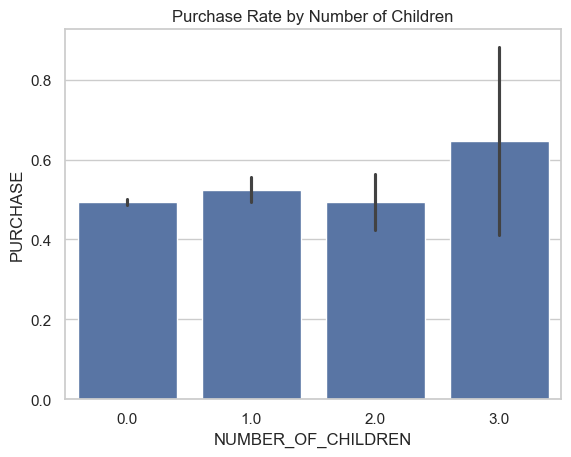

In [117]:
sns.barplot(x='NUMBER_OF_CHILDREN', y='PURCHASE', data=data, estimator=lambda x: sum(x)/len(x))
plt.title("Purchase Rate by Number of Children")
plt.show()


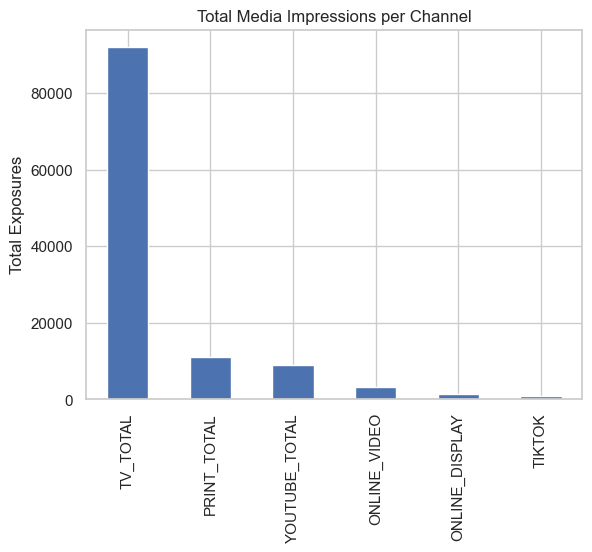

In [118]:
media_channels = ['TV_TOTAL', 'PRINT_TOTAL', 'ONLINE_VIDEO', 'ONLINE_DISPLAY', 'YOUTUBE_TOTAL', 'TIKTOK']

# Sum exposure per channel
media_exposure = data[media_channels].sum().sort_values(ascending=False)

# Plot media exposure
media_exposure.plot(kind='bar')
plt.title("Total Media Impressions per Channel")
plt.ylabel("Total Exposures")
plt.show()


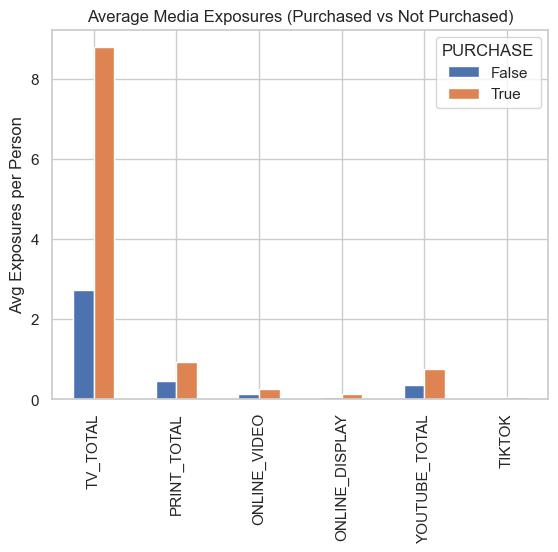

In [119]:
# Calculate average exposure for purchasers vs non-purchasers
purchase_by_channel = data.groupby('PURCHASE')[media_channels].mean().T
purchase_by_channel.plot(kind='bar')
plt.title("Average Media Exposures (Purchased vs Not Purchased)")
plt.ylabel("Avg Exposures per Person")
plt.show()


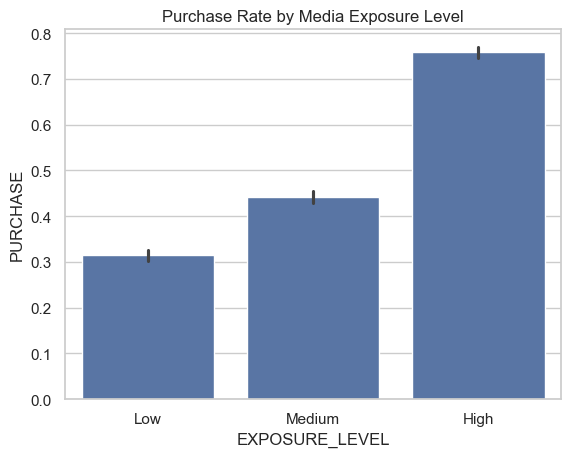

In [120]:
data['TOTAL_MEDIA_EXPOSURE'] = data[media_channels].sum(axis=1)

# Bin people into Low, Medium, and High media exposure
data['EXPOSURE_LEVEL'] = pd.qcut(data['TOTAL_MEDIA_EXPOSURE'], q=3, labels=['Low', 'Medium', 'High'])

sns.barplot(x='EXPOSURE_LEVEL', y='PURCHASE', data=data, estimator=lambda x: sum(x)/len(x))
plt.title("Purchase Rate by Media Exposure Level")
plt.show()

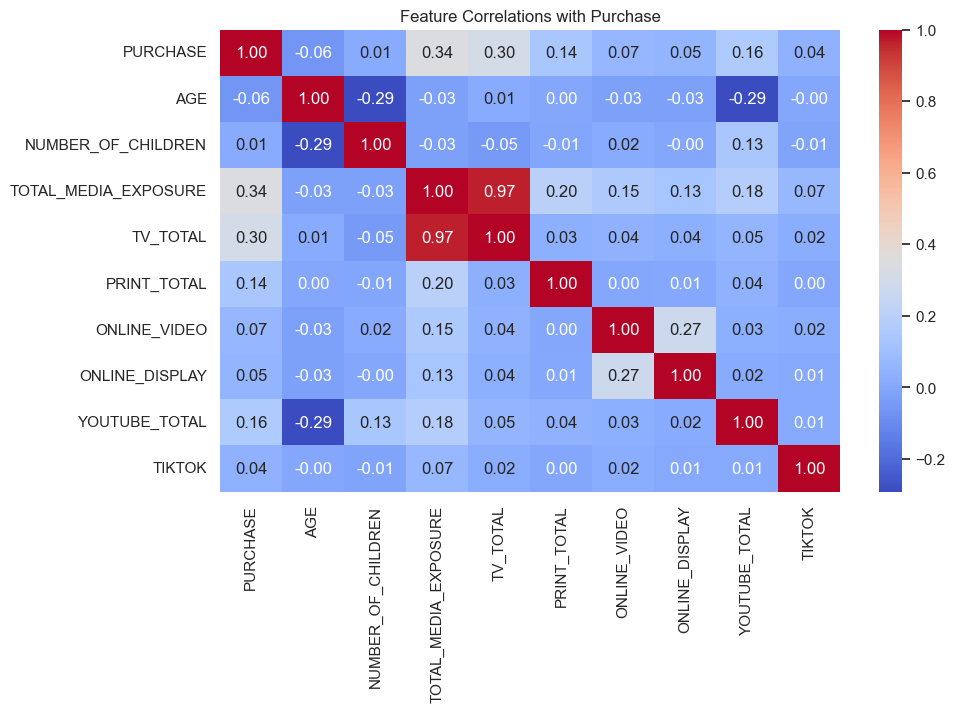

In [121]:
corr = data[['PURCHASE', 'AGE', 'NUMBER_OF_CHILDREN', 'TOTAL_MEDIA_EXPOSURE'] + media_channels].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlations with Purchase")
plt.show()

In [122]:
purchase_rate_by_age = data.groupby("AGE")["PURCHASE"].mean()
purchase_rate_by_gender = data.groupby("GENDER")["PURCHASE"].mean()
purchase_rate_by_household = data.groupby("HOUSEHOLD_SIZE")["PURCHASE"].mean()

In [123]:
purchase_rate_by_age

AGE
18.0     0.130435
19.0     0.071429
20.0     0.341463
21.0     0.288889
22.0     0.229167
           ...   
97.0     0.500000
98.0     0.333333
99.0     0.000000
100.0    0.000000
101.0    0.000000
Name: PURCHASE, Length: 84, dtype: float64

In [124]:
purchase_rate_by_gender

GENDER
Unknown    0.666667
female     0.472025
male       0.517495
Name: PURCHASE, dtype: float64

In [125]:
purchase_rate_by_household

HOUSEHOLD_SIZE
1.0     0.493874
2.0     0.483922
3.0     0.515924
4.0     0.515524
5.0     0.544601
6.0     0.500000
7.0     0.560000
8.0     0.500000
9.0     1.000000
10.0    0.000000
Name: PURCHASE, dtype: float64

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

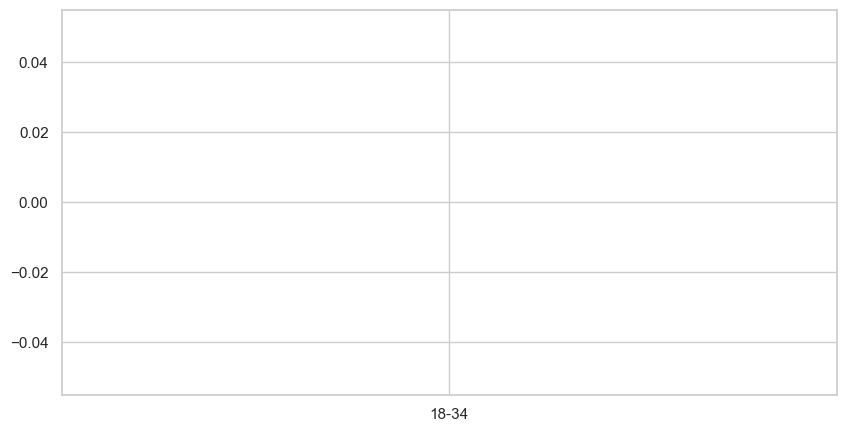

In [126]:
# Media Exposure by Age Group
plt.figure(figsize=(10, 5))
sns.barplot(x="AGE_GROUP", y="TOTAL_MEDIA_EXPOSURE", data=data, estimator=lambda x: np.average(x, weights=data.iloc[x.index, "WEIGHT"]))
plt.title("Weighted Total Media Exposure by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Media Exposure (Weighted)")
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'index'

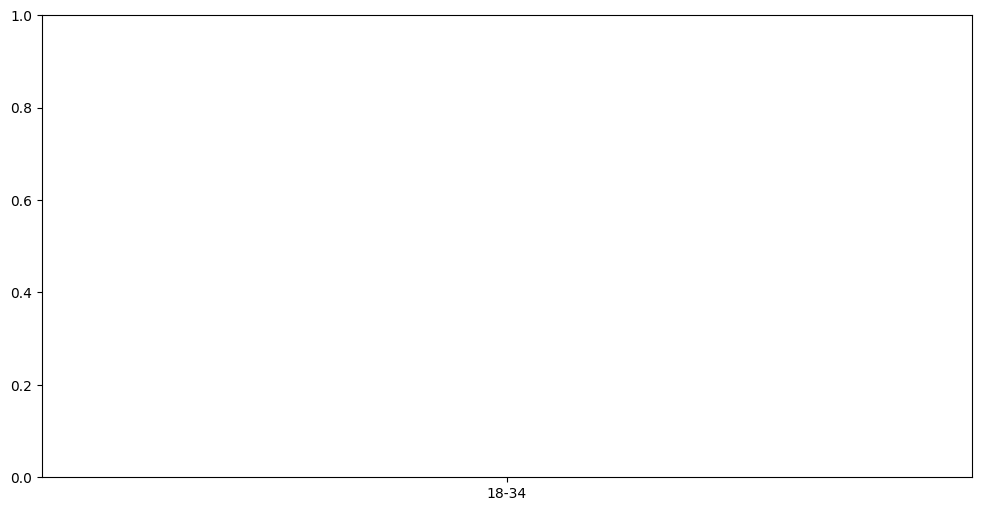

In [59]:
# Media Consumption by Channel Type
plt.figure(figsize=(12, 6))
channels = ["DIGITAL_MEDIA_TOTAL", "TRADITIONAL_MEDIA_TOTAL", "SOCIAL_MEDIA_TOTAL", "VIDEO_MEDIA_TOTAL"]

data_melted = data.melt(id_vars=["AGE_GROUP", "WEIGHT"], value_vars=channels, var_name="Media Type", value_name="Exposure")

sns.barplot(x="AGE_GROUP", y="Exposure", hue="Media Type", data=data_melted, estimator=lambda x: np.average(x, weights=data_melted.loc[x.index, "WEIGHT"]))
plt.title("Weighted Media Exposure by Age Group and Channel Type")
plt.xlabel("Age Group")
plt.ylabel("Weighted Media Exposure")
plt.legend(title="Media Type")
plt.xticks(rotation=45)
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'index'

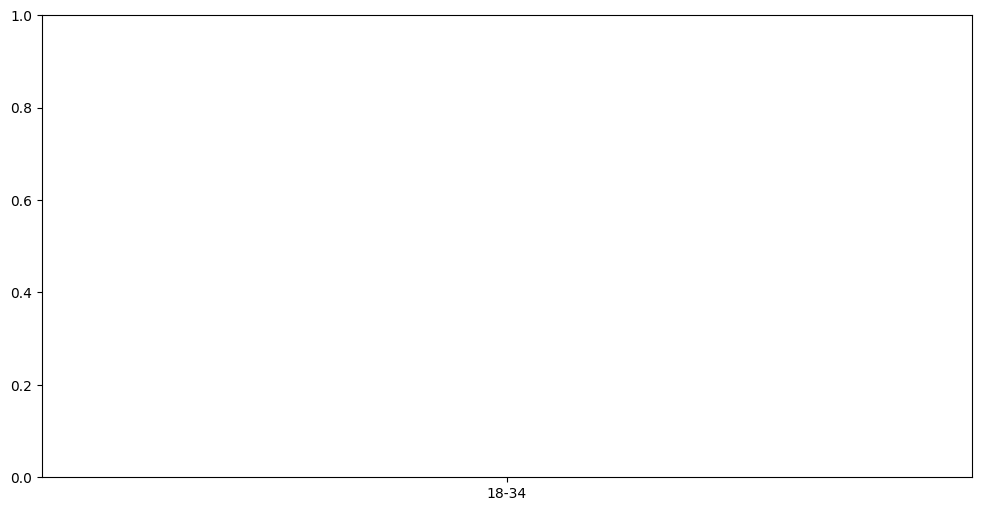

In [60]:
plt.figure(figsize=(12, 6))
channels = ["DIGITAL_MEDIA_TOTAL", "TRADITIONAL_MEDIA_TOTAL", "SOCIAL_MEDIA_TOTAL", "VIDEO_MEDIA_TOTAL"]

# Melt the dataframe
data_melted = data.melt(id_vars=["AGE_GROUP", "WEIGHT"], value_vars=channels, 
                         var_name="Media Type", value_name="Exposure")

# Define a proper estimator function
def weighted_avg(values, weights):
    return np.average(values, weights=weights)

sns.barplot(
    x="AGE_GROUP", 
    y="Exposure", 
    hue="Media Type", 
    data=data_melted, 
    estimator=lambda v: weighted_avg(v, data_melted.loc[v.index, "WEIGHT"])
)

plt.title("Weighted Media Exposure by Age Group and Channel Type")
plt.xlabel("Age Group")
plt.ylabel("Weighted Media Exposure")
plt.legend(title="Media Type")
plt.xticks(rotation=45)
plt.show()


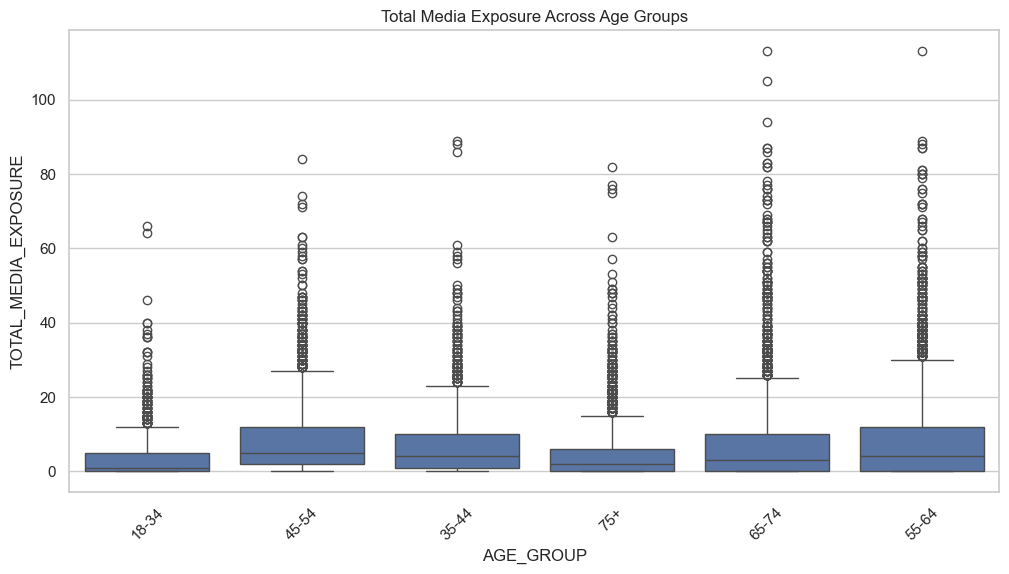

In [127]:
# Set style for consistency
sns.set(style="whitegrid")

# --- 1. Age Groups and Impressions Across Channels ---
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['AGE_GROUP'], y=data['TOTAL_MEDIA_EXPOSURE'])
plt.title('Total Media Exposure Across Age Groups')
plt.xticks(rotation=45)
plt.show()

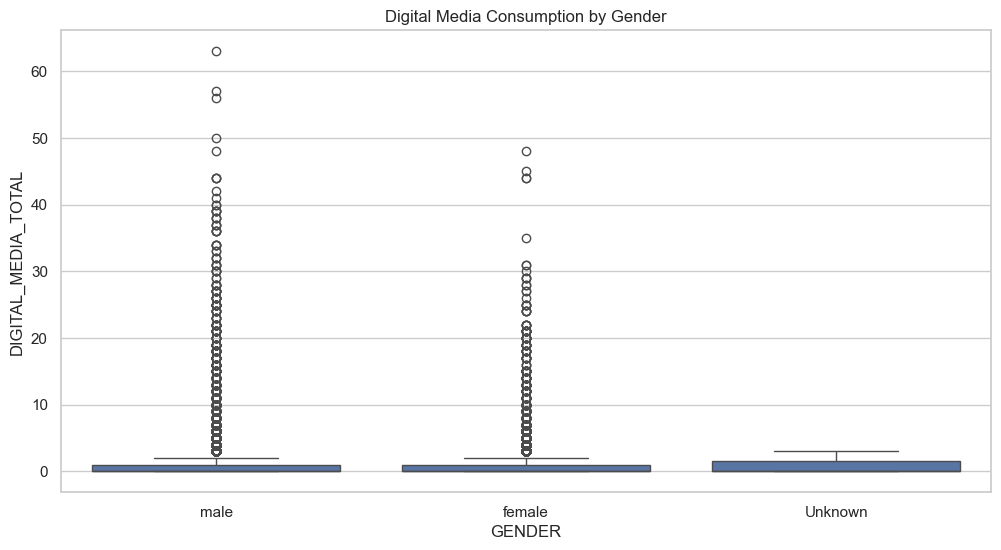

In [130]:
# --- 2. Media Consumption by Socio-Demographics ---
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['GENDER'], y=data['DIGITAL_MEDIA_TOTAL'])
plt.title('Digital Media Consumption by Gender')
plt.show()

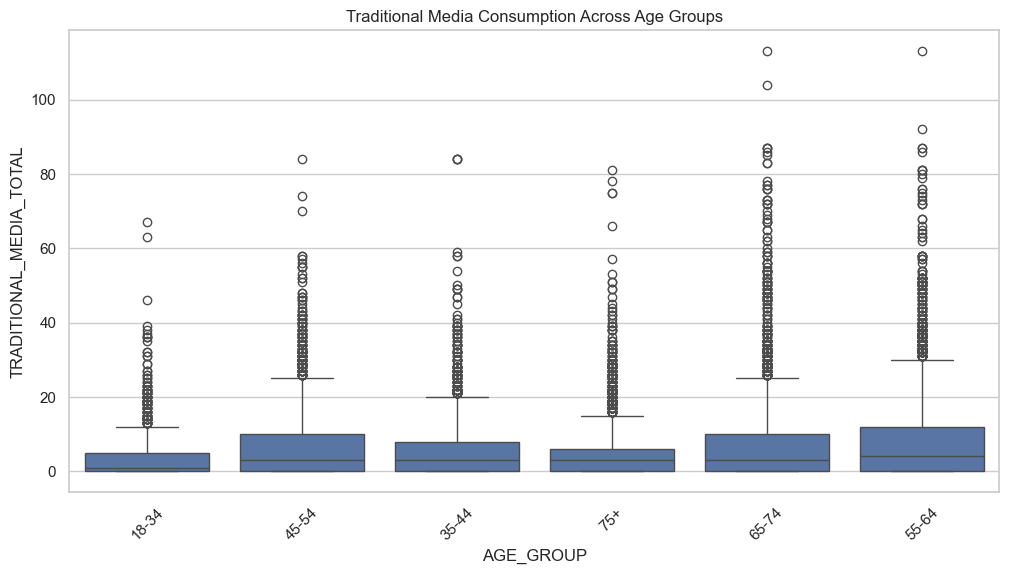

In [131]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['AGE_GROUP'], y=data['TRADITIONAL_MEDIA_TOTAL'])
plt.title('Traditional Media Consumption Across Age Groups')
plt.xticks(rotation=45)
plt.show()

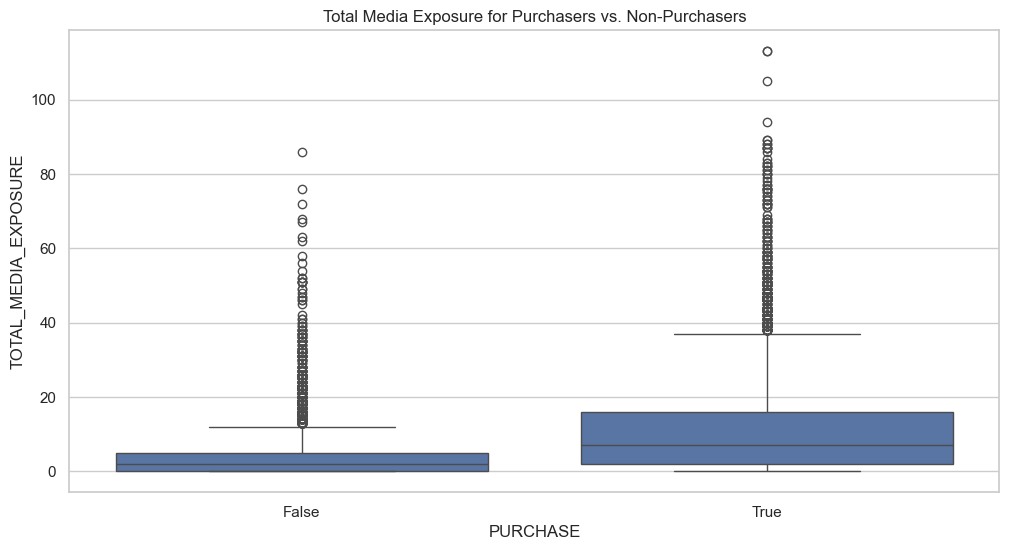

In [132]:
# --- 3. Media Channels Impact on Purchases ---
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['PURCHASE'], y=data['TOTAL_MEDIA_EXPOSURE'])
plt.title('Total Media Exposure for Purchasers vs. Non-Purchasers')
plt.show()

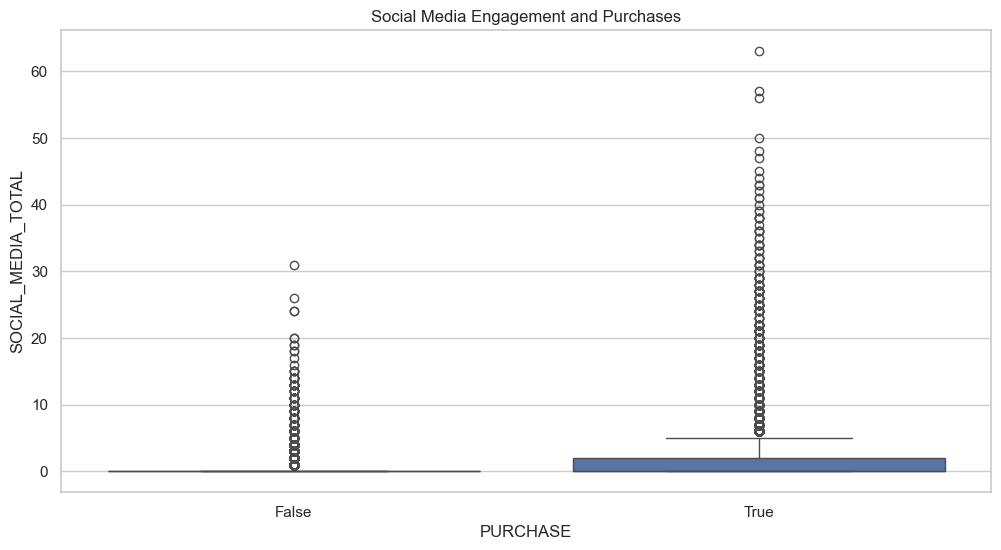

In [133]:
# --- 4. Social Media Impact ---
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['PURCHASE'], y=data['SOCIAL_MEDIA_TOTAL'])
plt.title('Social Media Engagement and Purchases')
plt.show()

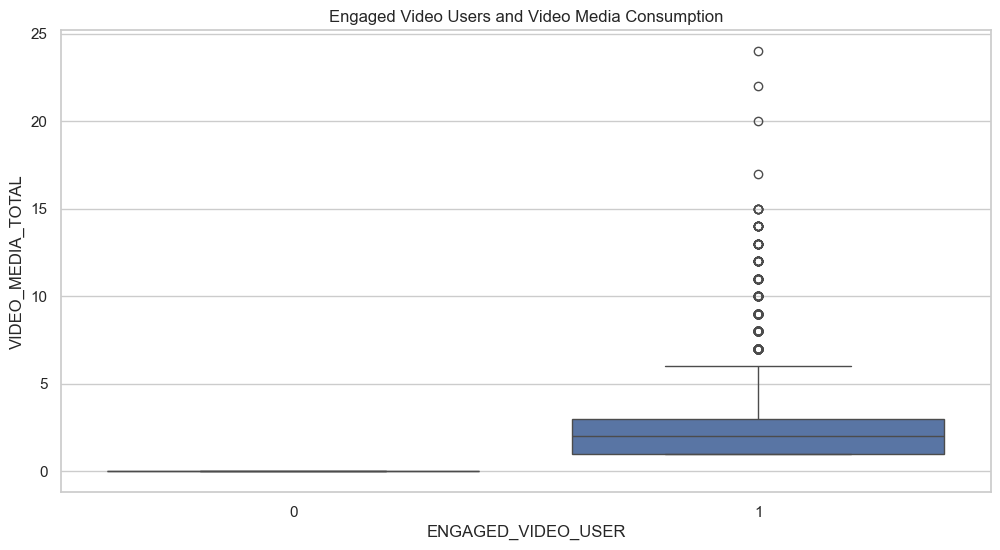

In [134]:
# --- 5. Video Media and Purchases ---
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['ENGAGED_VIDEO_USER'], y=data['VIDEO_MEDIA_TOTAL'])
plt.title('Engaged Video Users and Video Media Consumption')
plt.show()

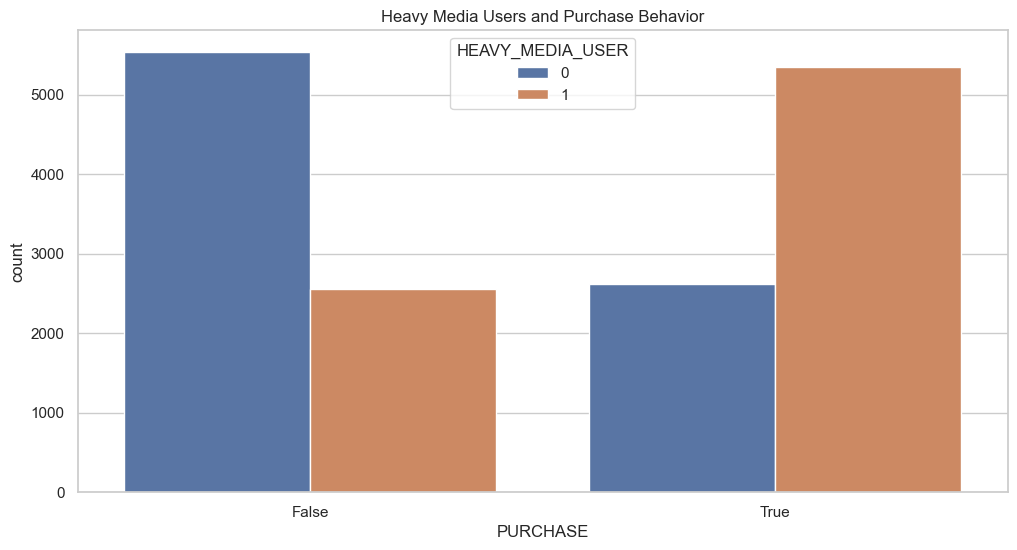

In [135]:
# --- 6. Heavy Media Users and Purchases ---
plt.figure(figsize=(12, 6))
sns.countplot(x='PURCHASE', hue='HEAVY_MEDIA_USER', data=data)
plt.title('Heavy Media Users and Purchase Behavior')
plt.show()

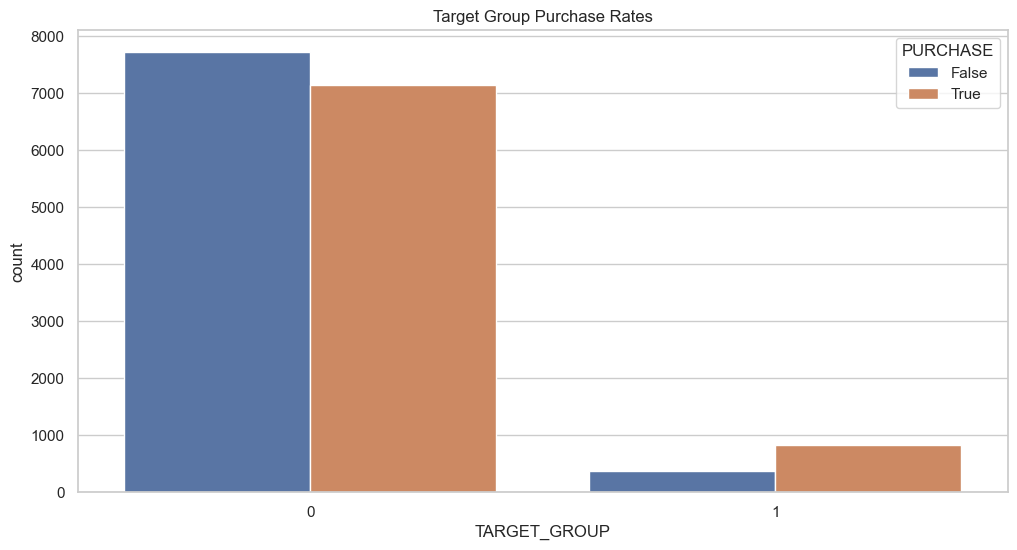

In [136]:
# --- 7. Target Group Breakdown ---
plt.figure(figsize=(12, 6))
sns.countplot(x='TARGET_GROUP', hue='PURCHASE', data=data)
plt.title('Target Group Purchase Rates')
plt.show()